# neural_network efficiency

In [8]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

import os
import sys
sys.path.append(os.path.abspath('..'))
from rnn_class.util import get_wikipedia_data
from rnn_class.brown import get_sentences_with_word2idx_limit_vocab, get_sentences_with_word2idx

from markov import get_bigram_probs

In [9]:
if __name__ == '__main__':
  
  sentences, word2idx = get_sentences_with_word2idx_limit_vocab(2000)
  
  V = len(word2idx)    
  print("Vocab size:", V)

 
  start_idx = word2idx['START']
  end_idx = word2idx['END']

  bigram_probs = get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=0.1)


  # train a shallow neural network model
  D = 100
  W1 = np.random.randn(V, D) / np.sqrt(V)
  W2 = np.random.randn(D, V) / np.sqrt(D)

  losses = []
  epochs = 1
  lr = 1e-2
  
  def softmax(a):
    a = a - a.max()
    exp_a = np.exp(a)
    return exp_a / exp_a.sum(axis=1, keepdims=True)

  # the loss if set W = log(bigram_probs)
  W_bigram = np.log(bigram_probs)
  bigram_losses = []

  t0 = datetime.now()
  for epoch in range(epochs):
    # shuffle sentences at each epoch
    random.shuffle(sentences)

    j = 0 
    for sentence in sentences:
      
      sentence = [start_idx] + sentence + [end_idx]
      n = len(sentence)
      inputs = sentence[:n-1]
      targets = sentence[1:]

      
      hidden = np.tanh(W1[inputs])
      predictions = softmax(hidden.dot(W2))

      
      loss = -np.sum(np.log(predictions[np.arange(n - 1), targets])) / (n - 1)
      losses.append(loss)

      # do a gradient descent step
      # do it after loss since the calculation of doutput will overwrite predictions
      # we don't want to make a copy because it would be slow
      doutput = predictions # N x V
      doutput[np.arange(n - 1), targets] -= 1
      W2 = W2 - lr * hidden.T.dot(doutput) # (D x N) (N x V)
      dhidden = doutput.dot(W2.T) * (1 - hidden * hidden) # (N x V) (V x D) * (N x D)
      # # for reference:
      # # original: W1 = W1 - lr * inputs.T.dot(dhidden) # VxN NxD --> VxD

      # fastest way
      np.subtract.at(W1, inputs, lr * dhidden)

      # test this
      # i = 0
      # for w in inputs: # don't include end token
      #   W1[w] = W1[w] - lr * dhidden[i]
      #   i += 1

      # vs this
      # oh_inputs = np.zeros((n - 1, V))
      # oh_inputs[np.arange(n - 1), sentence[:n-1]] = 1
      # W1 = W1 - lr * oh_inputs.T.dot(dhidden)

      # keep track of the bigram loss
      # only do it for the first epoch to avoid redundancy
      if epoch == 0:
        bigram_predictions = softmax(W_bigram[inputs])
        bigram_loss = -np.sum(np.log(bigram_predictions[np.arange(n - 1), targets])) / (n - 1)
        bigram_losses.append(bigram_loss)


      if j % 100 == 0:
        print("epoch:", epoch, "sentence: %s/%s" % (j, len(sentences)), "loss:", loss)
      j += 1

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

pattern 113
30 112
cars 112
whatever 112
sun 112
faith 111
pool 111
hospital 110
corps 110
wish 110
lack 110
completely 110
heavy 110
waiting 110
speak 110
ball 110
standard 110
extent 110
visit 109
democratic 109
firm 109
income 109
ahead 109
deep 109
there's 109
language 109
principle 109
none 108
price 108
designed 108
indicated 108
analysis 108
distance 108
expect 108
established 108
products 108
effects 108
growing 108
importance 108
continue 107
serve 107
determine 107
cities 107
elements 107
negro 107
leaders 107
division 107
pretty 107
easily 107
existence 107
attitude 107
stress 107
8 106
afternoon 106
limited 106
hardly 106
agreement 106
factors 106
scene 106
remained 106
closed 106
write 106
applied 106
health 105
married 105
suggested 105
attack 105
rhode 105
interested 105
station 105
professional 105
won't 105
drive 105
season 105
reach 105
b 105
despite 104
current 104
spent 104
eight 104
covered 104
role 104
played 104
i'd 104
becomes 104
date 103
council 103
race 103
u

thirty 59
sexual 59
tuesday 58
roads 58
commerce 58
p. 58
dallas 58
establish 58
previously 58
causes 58
talked 58
railroad 58
critical 58
remove 58
emphasis 58
grounds 58
neighborhood 58
surprised 58
minor 58
india 58
understood 58
perfect 58
avoid 58
somebody 58
hole 58
hence 58
leg 58
busy 58
occasion 58
smile 58
stone 58
roman 58
unique 58
animals 58
sky 58
safe 58
etc. 58
orders 58
fairly 58
liked 58
useful 58
exercise 58
lose 58
culture 58
pale 58
wondered 58
charged 57
details 57
informed 57
permitted 57
professor 57
replied 57
completion 57
processes 57
apart 57
apparent 57
bay 57
truck 57
majority 57
afraid 57
artist 57
goods 57
birds 57
appearance 57
baseball 57
spot 57
flowers 57
lewis 57
notes 57
enjoyed 57
entrance 57
uncle 57
alive 57
beneath 57
combination 57
truly 57
congo 57
becoming 57
requires 57
sample 57
bear 57
dictionary 57
shook 57
granted 56
l. 56
confidence 56
Vocab size: 2001
epoch: 0 sentence: 0/57013 loss: 7.60571432359885
epoch: 0 sentence: 100/57013 loss:

epoch: 0 sentence: 13500/57013 loss: 2.7693270344058245
epoch: 0 sentence: 13600/57013 loss: 3.4624268070149355
epoch: 0 sentence: 13700/57013 loss: 4.19038902305097
epoch: 0 sentence: 13800/57013 loss: 4.745483809272108
epoch: 0 sentence: 13900/57013 loss: 4.497879689544238
epoch: 0 sentence: 14000/57013 loss: 3.465010510841105
epoch: 0 sentence: 14100/57013 loss: 3.5556475273009
epoch: 0 sentence: 14200/57013 loss: 4.729179177185463
epoch: 0 sentence: 14300/57013 loss: 4.609878658422868
epoch: 0 sentence: 14400/57013 loss: 4.012660451373429
epoch: 0 sentence: 14500/57013 loss: 4.393202880647186
epoch: 0 sentence: 14600/57013 loss: 3.9243013821302375
epoch: 0 sentence: 14700/57013 loss: 4.032301690844993
epoch: 0 sentence: 14800/57013 loss: 4.761912553140424
epoch: 0 sentence: 14900/57013 loss: 4.323956422456466
epoch: 0 sentence: 15000/57013 loss: 4.717338134659576
epoch: 0 sentence: 15100/57013 loss: 4.082948795073727
epoch: 0 sentence: 15200/57013 loss: 4.395802556230388
epoch: 0 s

epoch: 0 sentence: 28400/57013 loss: 4.161816687279711
epoch: 0 sentence: 28500/57013 loss: 3.8742138251679954
epoch: 0 sentence: 28600/57013 loss: 4.419311319910268
epoch: 0 sentence: 28700/57013 loss: 4.658740901657194
epoch: 0 sentence: 28800/57013 loss: 4.5105240574808425
epoch: 0 sentence: 28900/57013 loss: 2.4404097491311543
epoch: 0 sentence: 29000/57013 loss: 4.462508297144966
epoch: 0 sentence: 29100/57013 loss: 4.627329706345254
epoch: 0 sentence: 29200/57013 loss: 4.310774361506812
epoch: 0 sentence: 29300/57013 loss: 2.780754661729493
epoch: 0 sentence: 29400/57013 loss: 3.7454388031621013
epoch: 0 sentence: 29500/57013 loss: 3.502902954882036
epoch: 0 sentence: 29600/57013 loss: 3.040208430558241
epoch: 0 sentence: 29700/57013 loss: 3.664696728527184
epoch: 0 sentence: 29800/57013 loss: 4.527889909993359
epoch: 0 sentence: 29900/57013 loss: 3.7832985510572748
epoch: 0 sentence: 30000/57013 loss: 4.53501866668975
epoch: 0 sentence: 30100/57013 loss: 4.137011911185707
epoch:

epoch: 0 sentence: 43300/57013 loss: 4.32506628472747
epoch: 0 sentence: 43400/57013 loss: 4.182289228438879
epoch: 0 sentence: 43500/57013 loss: 2.3503103728939885
epoch: 0 sentence: 43600/57013 loss: 4.40429231947558
epoch: 0 sentence: 43700/57013 loss: 4.644311787007597
epoch: 0 sentence: 43800/57013 loss: 3.4927323993851505
epoch: 0 sentence: 43900/57013 loss: 4.611579413377964
epoch: 0 sentence: 44000/57013 loss: 4.527244814198225
epoch: 0 sentence: 44100/57013 loss: 5.845924532876157
epoch: 0 sentence: 44200/57013 loss: 3.7841416713447464
epoch: 0 sentence: 44300/57013 loss: 5.017581621909771
epoch: 0 sentence: 44400/57013 loss: 4.543901180754944
epoch: 0 sentence: 44500/57013 loss: 4.65584668054199
epoch: 0 sentence: 44600/57013 loss: 4.39321345091234
epoch: 0 sentence: 44700/57013 loss: 4.257904034819654
epoch: 0 sentence: 44800/57013 loss: 4.012224385489237
epoch: 0 sentence: 44900/57013 loss: 2.298528468757796
epoch: 0 sentence: 45000/57013 loss: 3.683781871664732
epoch: 0 se

In [ ]:
  print("time training:", datetime.now() - t0)
    
    

avg_bigram_loss: 3.7779453269292613


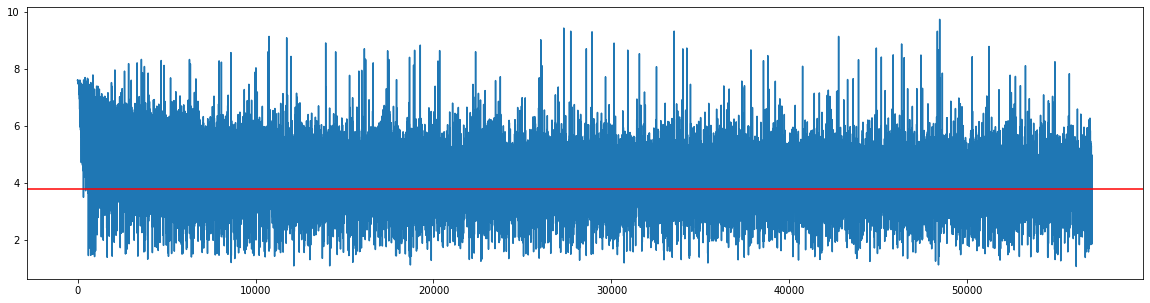

In [15]:
  
  plt.figure(figsize=(20,5))
  plt.plot(losses)

  # plot a horizontal line for the bigram loss
  avg_bigram_loss = np.mean(bigram_losses)
  print("avg_bigram_loss:", avg_bigram_loss)
  plt.axhline(y=avg_bigram_loss, color='r', linestyle='-')

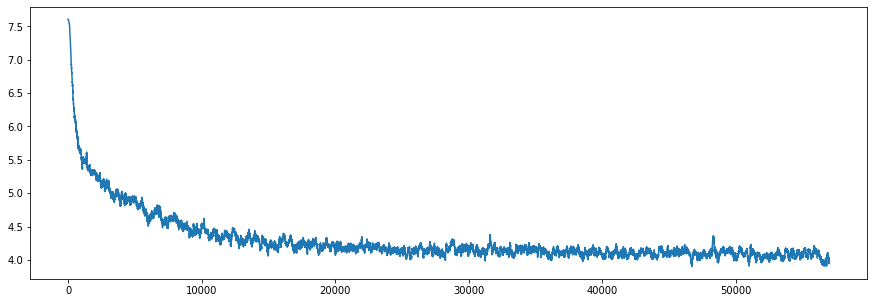

In [16]:
  # plot smoothed losses to reduce variability
  def smoothed_loss(x, decay=0.99):
    y = np.zeros(len(x))
    last = 0
    for t in range(len(x)):
      z = decay * last + (1 - decay) * x[t]
      y[t] = z / (1 - decay ** (t + 1))
      last = z
    return y
  plt.figure(figsize=(15,5))
  plt.plot(smoothed_loss(losses))
  plt.show()

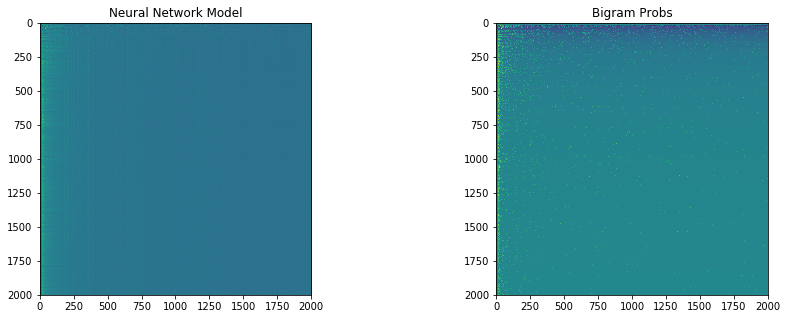

In [18]:
  # plot W and bigram probs side-by-side
  # for the most common 200 words
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title("Neural Network Model")
  plt.imshow(np.tanh(W1).dot(W2))
  plt.subplot(1,2,2)
  plt.title("Bigram Probs")
  plt.imshow(W_bigram)
  plt.show()